In [5]:
import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# 1.데이터로드 및 구조 변수 이해

In [6]:
data = pd.read_csv('data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# from sklearn.utils import resample
# import pandas as pd
#
# def perform_oversampling(data, label_column):
#     # 다수 클래스와 소수 클래스 분리
#     majority = data[data[label_column] == 0]
#     minority = data[data[label_column] == 1]
#
#     # 소수 클래스 오버샘플링
#     minority_upsampled = resample(
#         minority,
#         replace=True, # 복원추출
#         n_samples=len(majority), # 다수클래스 수만큼 소수클래스 늘리기
#         random_state=42
#     )
#
#     # 병합 및 셔플
#     upsampled_data = pd.concat([majority, minority_upsampled]) # 기존다수의 클래스와 소수 클래스를 합치기
#     return upsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
#
# # 사용 예시
# upsampled_df = perform_oversampling(data, label_column='Exited')
# data = upsampled_df

In [8]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

| 열 이름                              | 한국어 설명                                                                                                           |
| -----------------------| ---------------------------------------------------------------------|
| **RowNumber**          | 행 번호 (데이터셋에서 각 행의 고유 번호)                                                         |
| **CustomerId**           | 고객 ID (고객을 구분하기 위한 고유 식별자)                                                     |
| **Surname**                 | 성 (고객의 성씨)                                                                                                    |
| **CreditScore**           | 신용 점수 (신용 평가 점수로, 일반적으로 높을수록 신용도가 좋음을 의미) |
| **Geography**              | 지역 (France, Spain, Germany)                                                                       |
| **Gender**                     | 성별 (남성: Male, 여성: Female)                                                                       |
| **Age**                            | 나이 (고객의 나이)                                                                                                |
| **Tenure**                      | 거래 기간 (해당 은행에서 거래한 연수)                                                             |
| **Balance**                    | 계좌 잔고 (고객 계좌의 현재 잔액)                                                                      |
| **NumOfProducts**   | 이용 중인 금융상품 수 (고객이 은행에서 이용하고 있는 상품의 개수)          |
| **HasCrCard**             | 신용카드 보유 여부 (1: 있음, 0: 없음)                                                                 |
| **IsActiveMember**  | 활성 고객 여부 (1: 활동 중인 고객, 0: 비활성 고객)                                          |
| **EstimatedSalary**  | 추정 연봉 (고객의 연간 소득 추정치 달러)                                                         |
| **Exited**                       | 이탈 여부 (1: 계좌 해지 고객, 0: 계좌 유지 고객)                                               |

In [9]:
data.info() # 결측치 없음 확인
# Age 10대 20대 이렇게 나눠서?
# Tenure, NumOfProducts, HasCrCard, IsActiveMember,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 2.데이터 및 기술통계

In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [12]:
# 중복값 여부 확인
print(data.duplicated('CustomerId').sum())

0


In [13]:
data.value_counts('Geography')

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# 3. 이상치 탐지

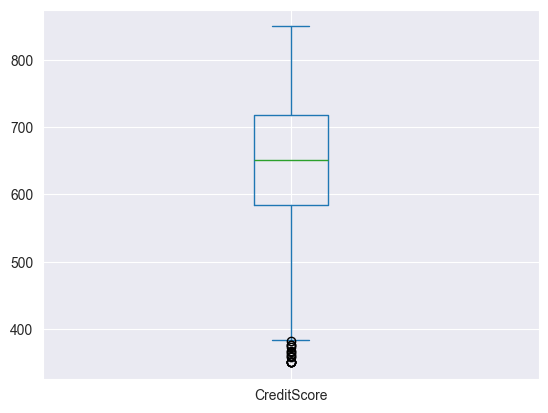

In [14]:
data['CreditScore'].plot(kind='box')
plt.show()

<Axes: >

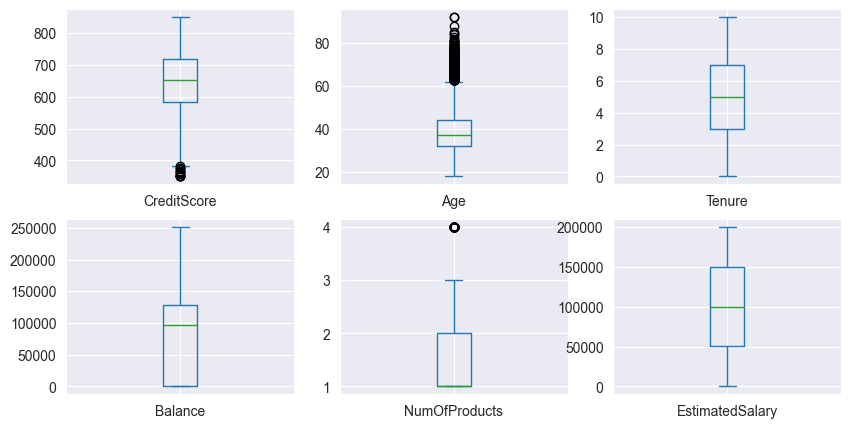

In [15]:
_, ax = plt.subplots(2, 3, figsize=(10, 5))

# 연속형 데이터 박스플롯으로 이상치 확인
data['CreditScore'].plot(kind='box', ax=ax[0][0]) # 신용등급 차이가 꽤 유의미하게 난다고 생각
data['Age'].plot(kind='box', ax=ax[0][1]) # 살아있는 고령자가 흔치 않아서 저런가?
data['Tenure'].plot(kind='box', ax=ax[0][2])
data['Balance'].plot(kind='box', ax=ax[1][0])
data['NumOfProducts'].plot(kind='box', ax=ax[1][1]) # 4개 쓰는 사람이 누구인지 봐야할듯?
data['EstimatedSalary'].plot(kind='box', ax=ax[1][2])

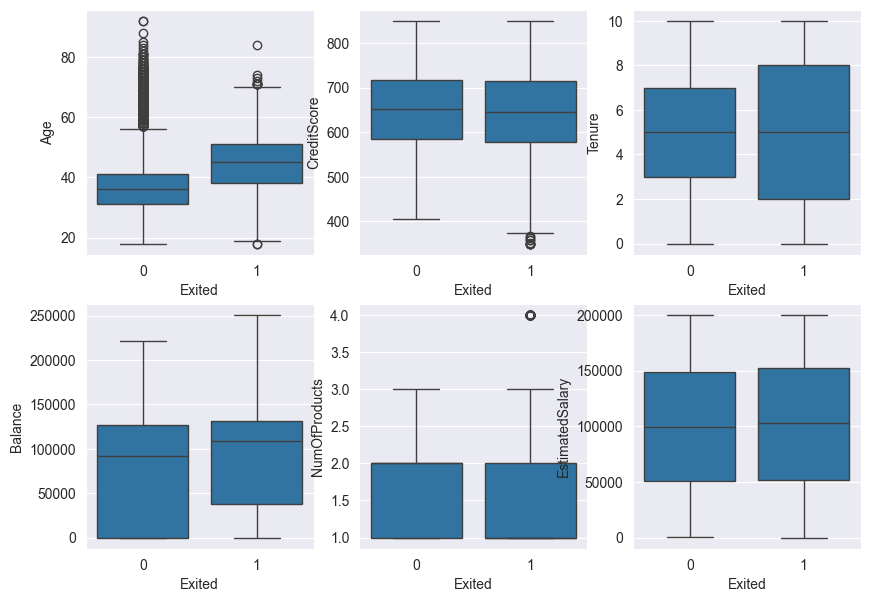

In [16]:
_, ax = plt.subplots(2, 3, figsize=(10, 7))

sns.boxplot(x='Exited', y='Age', data=data, ax=ax[0][0])
sns.boxplot(x='Exited', y='CreditScore', data=data, ax=ax[0][1])
sns.boxplot(x='Exited', y='Tenure', data=data, ax=ax[0][2])
sns.boxplot(x='Exited', y='Balance', data=data, ax=ax[1][0])
sns.boxplot(x='Exited', y='NumOfProducts', data=data, ax=ax[1][1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=data, ax=ax[1][2])
plt.show()

# 4. 변수분포 시각화

<Axes: xlabel='IsActiveMember', ylabel='count'>

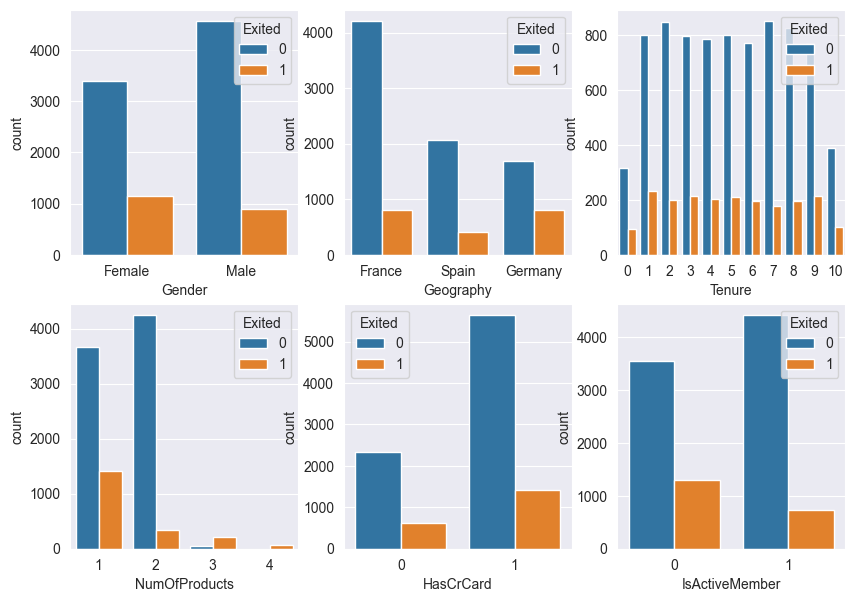

In [17]:
# 명목형 자료들의 이탈 비교
_, ax = plt.subplots(2, 3, figsize=(10, 7))

sns.countplot(data=data, x='Gender', hue='Exited', ax=ax[0][0]) # 비율적으로 여성의 이탈률이 10퍼 정도 높음
sns.countplot(data=data, x='Geography', hue='Exited', ax=ax[0][1])
sns.countplot(data=data, x='Tenure', hue='Exited', ax=ax[0][2])
sns.countplot(data=data, x='NumOfProducts', hue='Exited', ax=ax[1][0])
sns.countplot(data=data, x='HasCrCard', hue='Exited', ax=ax[1][1])
sns.countplot(data=data, x='IsActiveMember', hue='Exited', ax=ax[1][2]) # 비활성 고객이 이탈 할 확률이 높아보임

# 5.변수관계 시각화

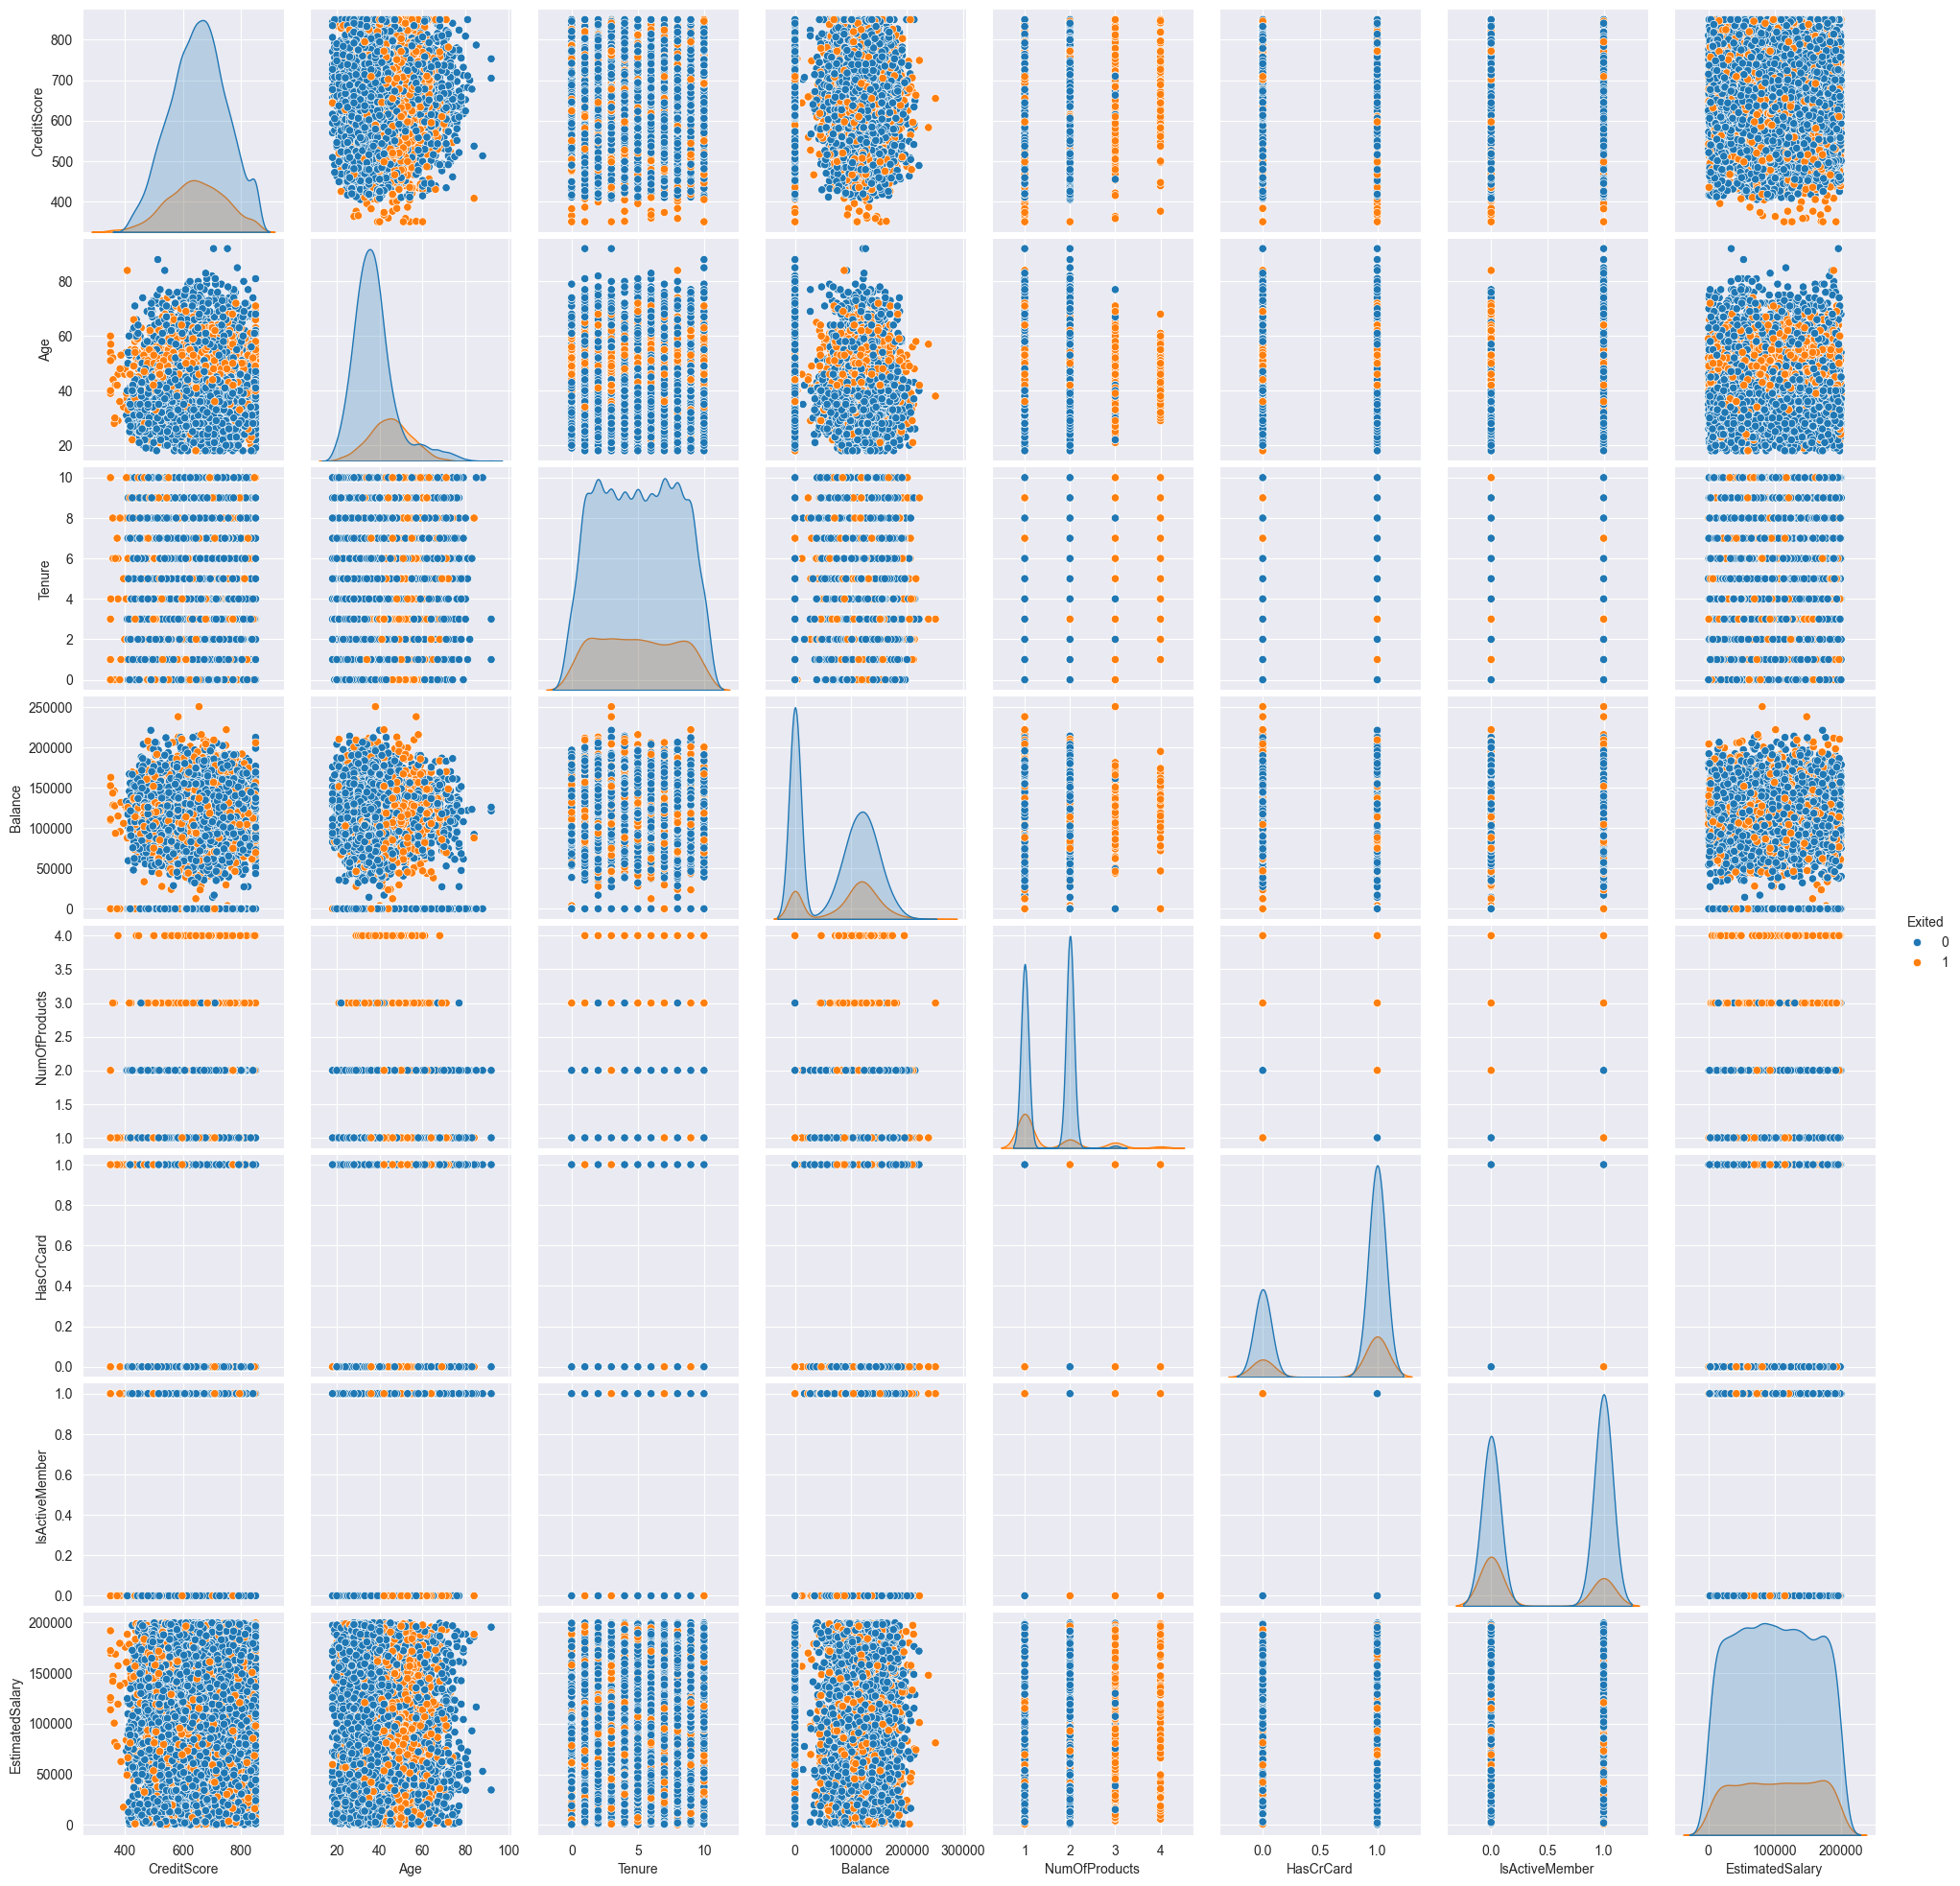

In [18]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
sns.pairplot(data=data, hue='Exited')
plt.show()

In [19]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# 6. 상관관계 및 교차분석

In [20]:
corr_mat = data.corr(numeric_only=True)
corr_mat.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


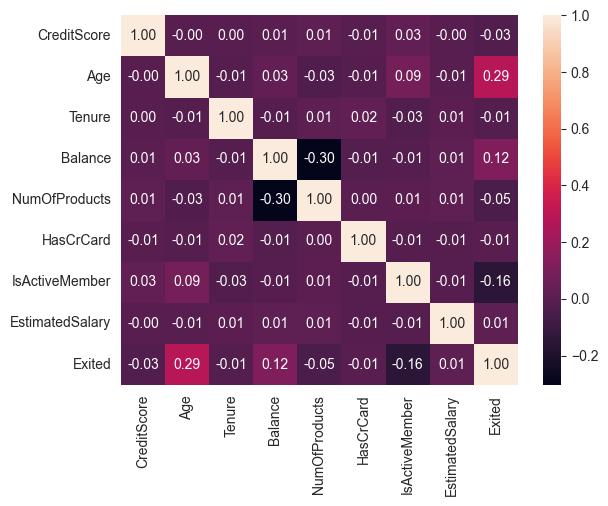

In [21]:
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

# 7. feature engineering

In [22]:
# from sklearn.preprocessing import LabelEncoder
#
# encoder = LabelEncoder()
#
# # 남성 0 , 여성 1
# data.loc[:, 'Gender'] = encoder.fit_transform(data['Gender'])
# print(encoder.classes_)
# data.head()

In [23]:
# 지역 원핫인코딩 실시
data = pd.get_dummies(data, columns=['Geography', 'Gender'], dtype=int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [24]:
# 나이그룹 범주형으로 변환
# data['AgeGroup']= pd.cut(data['Age'], bins =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, data['Age'].max()], labels=range(10)).astype(int)
# data = data.drop(columns=['Age'])
# data

In [25]:
# # Exited와 Agegroup 간의 상관관계가 오히려 떨어짐 -> 기존의 age를 사용하는게 나음
# corr_mat = data.corr(numeric_only=True)
# corr_mat.head()
# sns.heatmap(corr_mat, annot=True, fmt='.2f')
# plt.show()

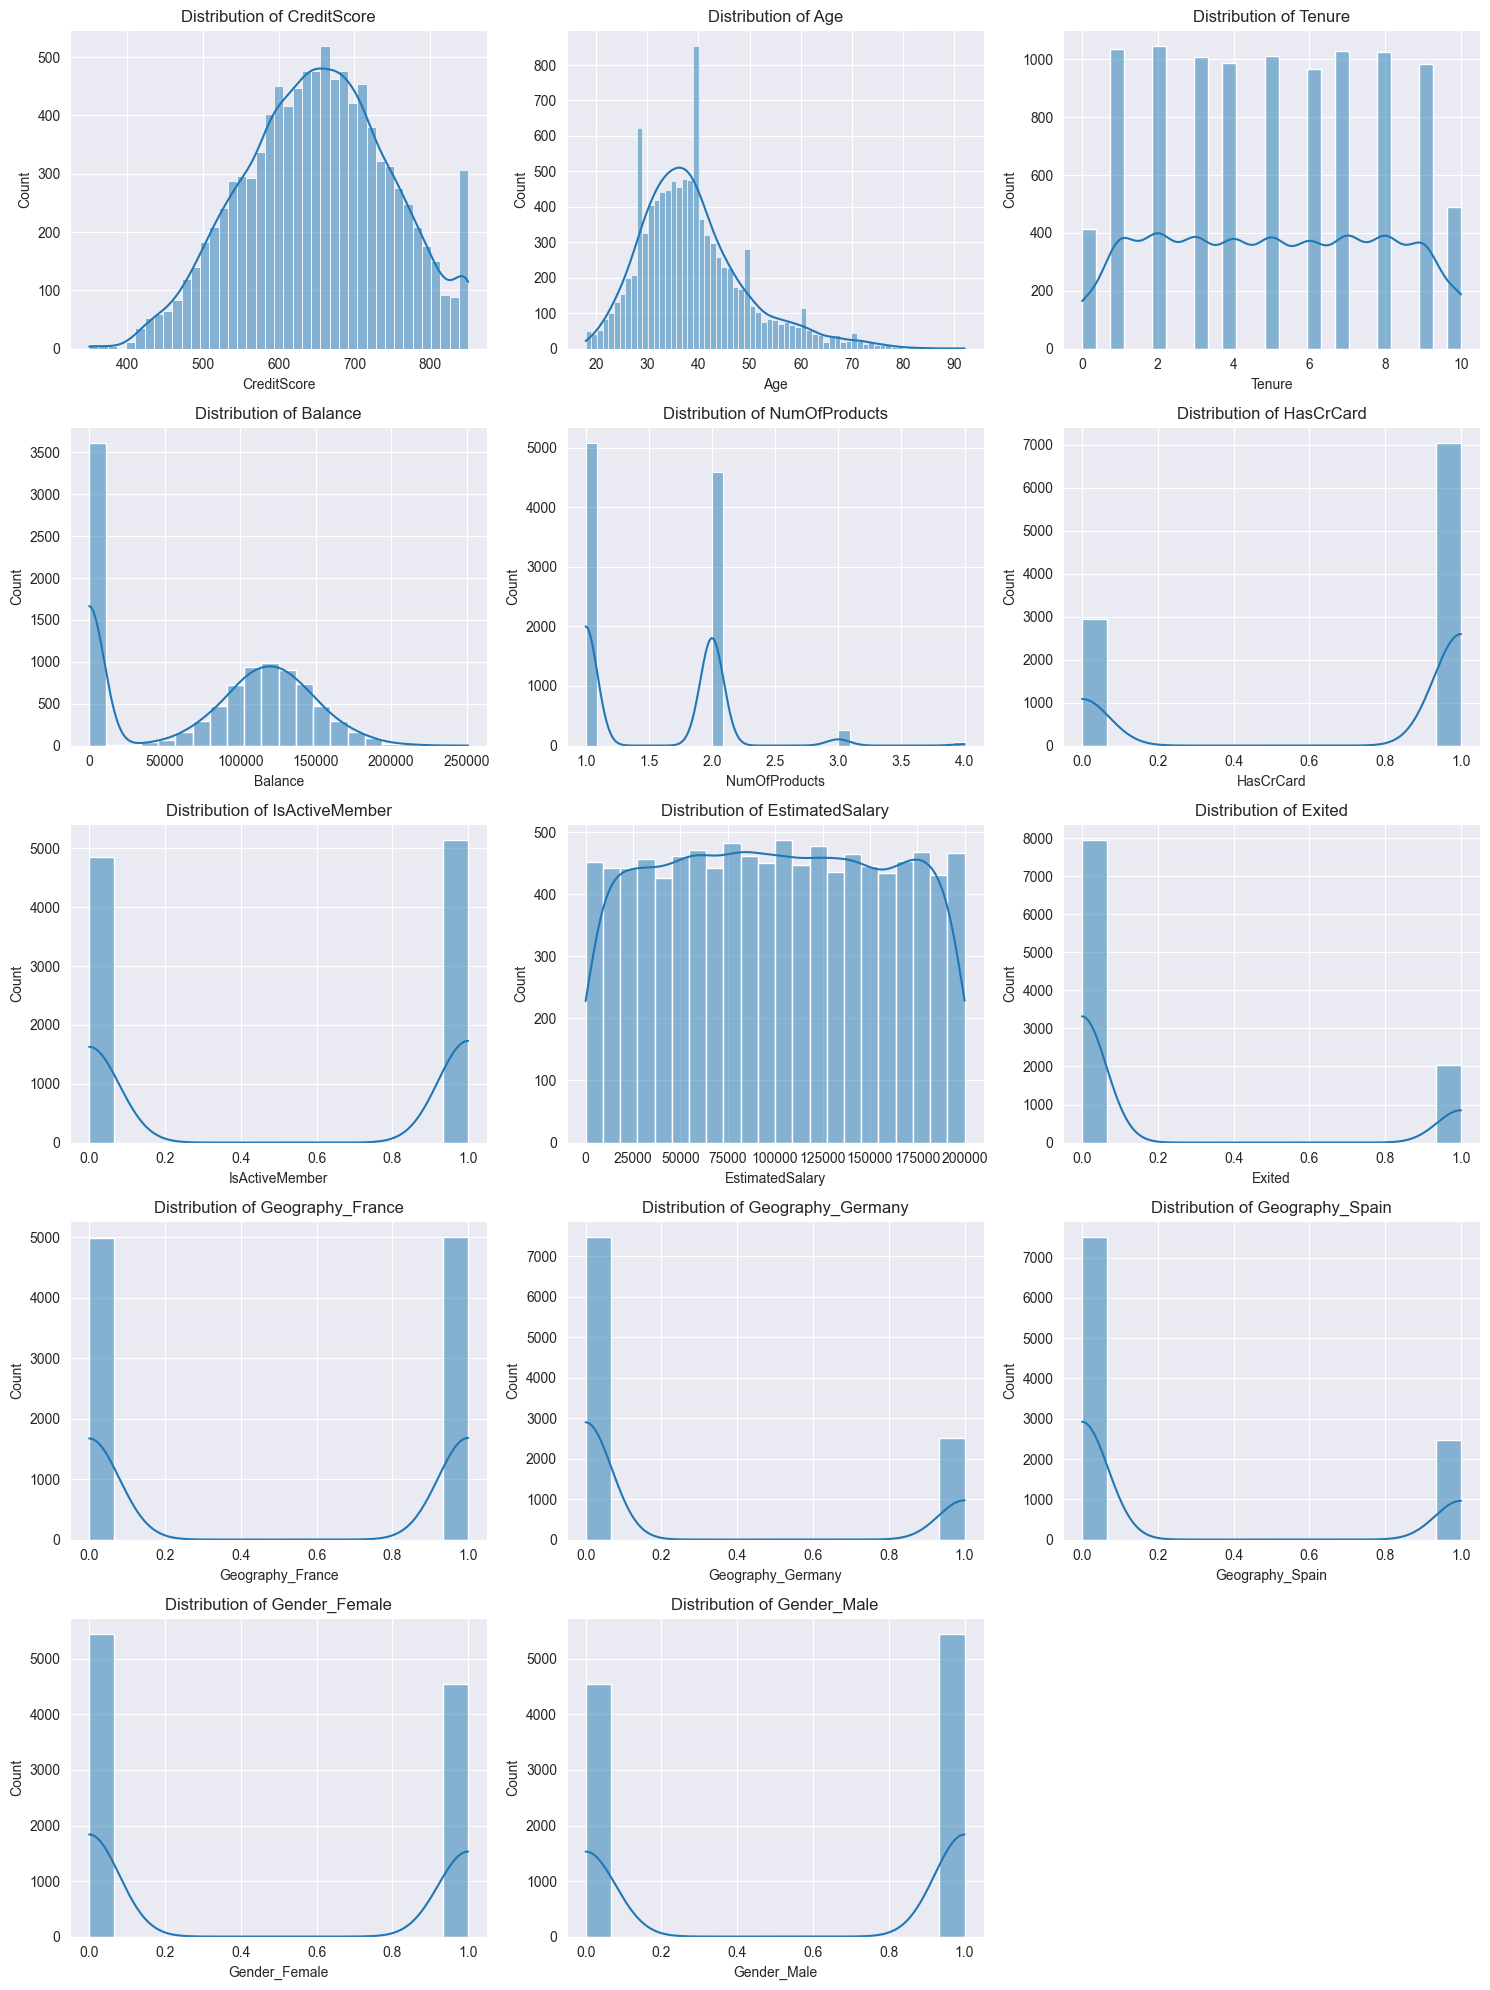

In [26]:
# 연속형 수치형 데이터만 추출
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# subplot 크기 설정
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# 변수별 히스토그램 시각화
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [27]:
# sns.histplot(data=data, x='CreditScore')
# plt.show()
#
# # 연속형 변수들을 로그 스케일링 실시
# data['LogCreditScore'] = data['CreditScore'].apply(lambda x: np.log1p(x))
# sns.histplot(data=data, x='LogCreditScore')
# plt.show()

# -> 스케일링을 헀는데 오히려 더 치우친걸 보니 스케일링 할 필요없는 특성

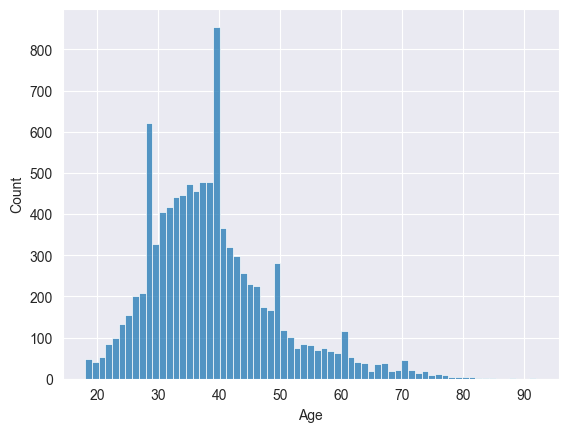

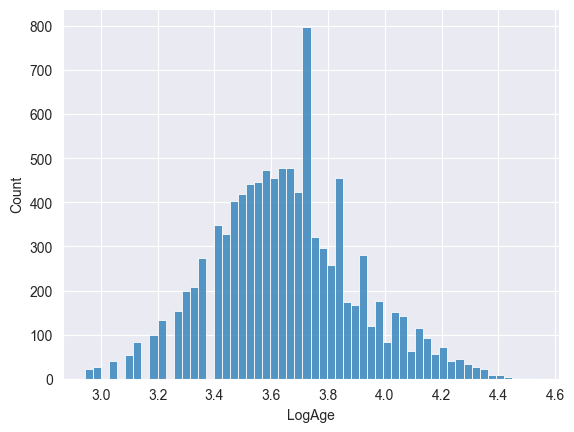

In [28]:
sns.histplot(data=data, x='Age')
plt.show()

# 연속형 변수들을 로그 스케일링 실시
data['LogAge'] = data['Age'].apply(lambda x: np.log1p(x))
sns.histplot(data=data, x='LogAge')
plt.show()

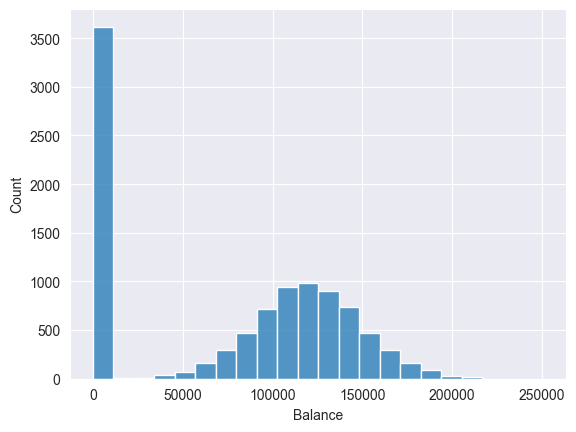

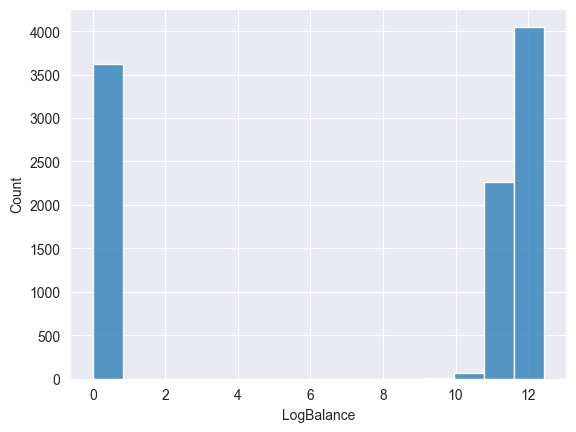

In [29]:
sns.histplot(data=data, x='Balance')
plt.show()

# 연속형 변수들을 로그 스케일링 실시
data['LogBalance'] = data['Balance'].apply(lambda x: np.log1p(x))
sns.histplot(data=data, x='LogBalance')
plt.show()

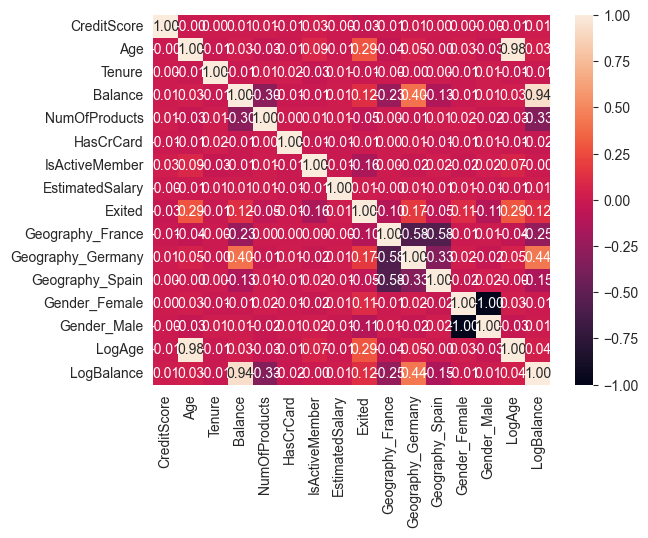

In [30]:
corr_mat = data.corr(numeric_only=True)

sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [31]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,LogAge,LogBalance
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,3.761200,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,3.737670,11.336294
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,3.761200,11.980813
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,3.688879,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,3.784190,11.740155


# 08. 데이터분할 및 스케일링

In [32]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
#
# # 일단 로그칼럼들을 제외하고 적용
# X = data.drop(columns=['Exited', 'LogBalance', 'LogAge'])
# y = data['Exited']
#
# Banking_df = pd.DataFrame(X, columns=X.columns) # 칼럼이름 보존
#
# X_train, X_test, y_train, y_test = train_test_split(Banking_df, y, test_size=0.2, random_state=42, stratify=y)
#
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 로그칼럼들을 적용
X = data.drop(columns=['Exited', 'Balance', 'Age'])
y = data['Exited']

Banking_df = pd.DataFrame(X, columns=X.columns) # 칼럼이름 보존

X_train, X_test, y_train, y_test = train_test_split(Banking_df, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 13) (8000,)
(2000, 13) (2000,)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 13) (8000,)
(2000, 13) (2000,)


In [35]:
X_train[:5]

array([[ 0.35649971,  0.34567966,  0.80843615,  0.64920267,  0.97481699,
         1.36766974,  1.00150113, -0.57946723, -0.57638802, -0.91324755,
         0.91324755, -0.62306885, -1.31865143],
       [-0.20389777, -0.3483691 ,  0.80843615,  0.64920267,  0.97481699,
         1.6612541 , -0.99850112,  1.72572313, -0.57638802, -0.91324755,
         0.91324755,  0.42501469,  0.76322854],
       [-0.96147213, -0.69539349, -0.91668767,  0.64920267, -1.02583358,
        -0.25280688, -0.99850112, -0.57946723,  1.73494238, -0.91324755,
         0.91324755, -1.72238672,  0.75580527],
       [-0.94071667,  1.38675281, -0.91668767,  0.64920267, -1.02583358,
         0.91539272,  1.00150113, -0.57946723, -0.57638802,  1.09499335,
        -1.09499335, -1.2736475 ,  0.78559672],
       [-1.39733684,  1.38675281, -0.91668767, -1.54035103, -1.02583358,
        -1.05960019,  1.00150113, -0.57946723, -0.57638802, -0.91324755,
         0.91324755,  1.54103986,  0.79394435]])

## 1-1. 결정트리

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

dt_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=100,
    min_samples_leaf=5,

)
dt_clf.fit(X_train, y_train)



print('학습셋 R^2: ', dt_clf.score(X_train, y_train))
print('평가셋 R^2: ', dt_clf.score(X_test, y_test))

학습셋 R^2:  0.85625
평가셋 R^2:  0.857


In [50]:
# 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=3, # 교차검증 폴드 수
    n_jobs=-1, # 병렬 처리 (가능한 모든 코어 사용)
    scoring='f1') # n_jobs는 cpu개수 제한
grid_search.fit(X_train, y_train)

print('best_params_:', grid_search.best_params_)
print('best_score_:', grid_search.best_score_)

best_model = grid_search.best_estimator_
print('학습셋:',best_model.score(X_train, y_train))
print('평가셋:',best_model.score(X_test, y_test))

# 테스트셋 예측 및 성능 평가
y_pred = best_model.predict(X_test)
print("Accuracy (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

best_params_: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_score_: 0.5434363173656417
학습셋: 0.85625
평가셋: 0.858
Accuracy (Test): 0.858

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000


Confusion Matrix:
 [[1531   62]
 [ 222  185]]


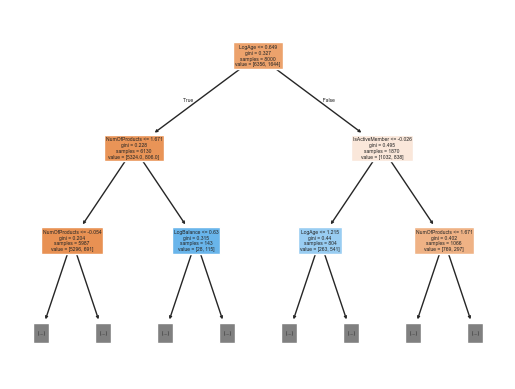

In [38]:
# 시각화
from sklearn.tree import plot_tree

plot_tree(
    dt_clf,
    filled=True,
    feature_names=X.columns,
    max_depth=2
)
plt.savefig('dt_tree_bank_exited.png', dpi=300, bbox_inches='tight')
plt.show()

## 1-2. SGDClassifier

In [53]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 준비
X = data.drop(columns=['Exited', 'Balance', 'Age'])  # 로그 변환된 칼럼으로 대체 가능
y = data['Exited']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'loss': ['log_loss', 'hinge'],  # 'log_loss' = 로지스틱 회귀, 'hinge' = SVM 방식
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'eta0': [0.01, 0.1],
    'max_iter': [1000],
    'tol': [1e-3]
}

# GridSearchCV 설정
grid = GridSearchCV(
    estimator=SGDClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # 또는 'f1', 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 학습 수행
grid.fit(X_train_scaled, y_train)

# 최적 모델과 파라미터
best_model = grid.best_estimator_
print("Best Parameters:\n", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# 테스트셋 예측 및 성능 평가
y_pred = best_model.predict(X_test_scaled)
print("Accuracy (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log_loss, max_iter=1000, penalty=l2, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log_loss, max_iter=1000, penalty=elasticnet, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=elasticnet, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=elasticnet, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=log_loss, max_iter=1000, penalty=l1, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=log_loss, max_iter=1000, penalty=l1, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, loss=log_loss, max_iter=1000, penalty=l2, tol=0.001; total time=   0.0s
[CV] END al

In [54]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import numpy as np
import pandas as pd

def metric_df_classifier(X_train, X_test, y_train, y_test):
    model_names = []
    accs, pres, recs, f1s, rocs, log_losses = [], [], [], [], [], []

    models = {
        'KNN 분류기': KNeighborsClassifier(),
        '로지스틱 회귀': LogisticRegression(max_iter=5000, solver='lbfgs'),
        '결정트리 분류기': DecisionTreeClassifier(random_state=42),
        'SGD 분류기': SGDClassifier(random_state=42),
        'Ridge 분류기': RidgeClassifier(),
        '랜덤포레스트 분류기': RandomForestClassifier(n_estimators=5000, random_state=42),
        'XGBoost 분류기': XGBClassifier(eval_metric='logloss', random_state=42),
        'CatBoost 분류기': CatBoostClassifier(random_state=42),
        'LightGBM 분류기': LGBMClassifier(random_state=42),
        'HistGBM 분류기' : HistGradientBoostingClassifier(random_state=42)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        model_names.append(model_name)
        accs.append(accuracy_score(y_test, pred))
        pres.append(precision_score(y_test, pred))
        recs.append(recall_score(y_test, pred))
        f1s.append(f1_score(y_test, pred))
        rocs.append(roc_auc_score(y_test, pred_proba) if pred_proba is not None else np.nan)
        log_losses.append(log_loss(y_test, pred_proba) if pred_proba is not None else np.nan)

    score_df = pd.DataFrame({
        '모델': model_names,
        'Accuracy': accs,
        'Precision': pres,
        'Recall': recs,
        'F1-Score': f1s,
        'ROC AUC': rocs,
        'Log Loss': log_losses
    })

    return score_df.round(3)

In [55]:
score_df = metric_df_classifier(X_train, X_test, y_train, y_test)
display(score_df)

/Users/joseongjae/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joseongjae/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Learning rate set to 0.025035
0:	learn: 0.6705826	total: 5.04ms	remaining: 5.04s
1:	learn: 0.6520868	total: 6.83ms	remaining: 3.41s
2:	learn: 0.6360719	total: 8.5ms	remaining: 2.83s
3:	learn: 0.6192722	total: 10.4ms	remaining: 2.59s
4:	learn: 0.6031228	total: 12.4ms	remaining: 2.47s
5:	learn: 0.5882502	total: 14.4ms	remaining: 2.38s
6:	learn: 0.5746267	total: 16.8ms	remaining: 2.38s
7:	learn: 0.5644195	total: 18.8ms	remaining: 2.34s
8:	learn: 0.5517658	total: 21.6ms	remaining: 2.38s
9:	learn: 0.5418637	total: 23.6ms	remaining: 2.34s
10:	learn: 0.5308992	total: 25.4ms	remaining: 2.29s
11:	learn: 0.5205762	total: 27.8ms	remaining: 2.29s
12:	learn: 0.5099238	total: 30.5ms	remaining: 2.31s
13:	learn: 0.5021064	total: 32.6ms	remaining: 2.29s
14:	learn: 0.4926634	total: 35.1ms	remaining: 2.31s
15:	learn: 0.4846542	total: 38.9ms	remaining: 2.39s
16:	learn: 0.4771718	total: 41ms	remaining: 2.37s
17:	learn: 0.4719748	total: 43.1ms	remaining: 2.35s
18:	learn: 0.4652941	total: 45.2ms	remaining: 2

,모델,Accuracy,Precision,Recall,F1-Score,ROC AUC,Log Loss
0,KNN 분류기,0.768,0.225,0.057,0.090,0.510,2.886
1,로지스틱 회귀,0.812,0.619,0.192,0.293,0.778,0.422
2,결정트리 분류기,0.784,0.472,0.516,0.493,0.684,7.785
3,SGD 분류기,0.796,0.000,0.000,0.000,NaN,NaN
4,Ridge 분류기,0.811,0.738,0.111,0.192,NaN,NaN
5,랜덤포레스트 분류기,0.859,0.757,0.452,0.566,0.854,0.348
6,XGBoost 분류기,0.851,0.687,0.491,0.573,0.839,0.377
7,CatBoost 분류기,0.865,0.775,0.474,0.588,0.861,0.333
8,LightGBM 분류기,0.864,0.752,0.491,0.594,0.859,0.339
9,HistGBM 분류기,0.860,0.737,0.489,0.588,0.857,0.341
